# Confidence Tests
## Name: Brshank Singh Negi
## Roll No: I032
## B.Tech AI
# **EXPT 9**


## TARGET: WAP for the CONFIDENCE levels and z -Tests
 

# **AIM**
## 1.Investigate point estimates by generating a population of random age data and then drawing a sample from it to estimate the mean
## 2. Identify the Interval Estimates using confidence interval of 95% 

# **Application:** 
## To know the average age of registered voters in the U.S., take a survey of registered voters and then use the average age of the respondents as a point estimate of the average age of the population as a whole. 
# **Note:** 
## The average of a sample is known as the sample mean.The sample mean is usually not exactly the same as the population mean.

In [1]:
%matplotlib inline 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import math
import random
import seaborn as sns

In [3]:
np.random.seed(10)
Population_ages1=stats.poisson.rvs(loc=18,mu=35,size=150000)
Population_ages2=stats.poisson.rvs(loc=18,mu=10,size=100000)
Population_ages=np.concatenate((Population_ages1, Population_ages2))

In [4]:
print('mean of the Population_Ages::=')
Population_ages.mean()

mean of the Population_Ages::=


43.002372

C:\Users\Negi\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Poisson disto'), Text(0, 0.5, 'Frequency')]

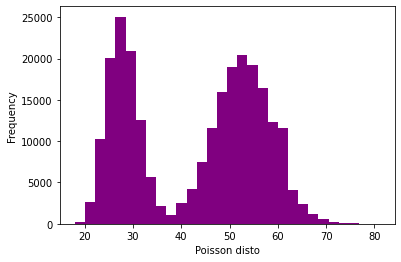

In [5]:
ax=sns.distplot(Population_ages,bins=30,kde=False,color='purple',hist_kws={"linewidth":15,'alpha':1})
ax.set(xlabel='Poisson disto',ylabel='Frequency')

[Text(0.5, 0, 'Poisson disto'), Text(0, 0.5, 'Frequency')]

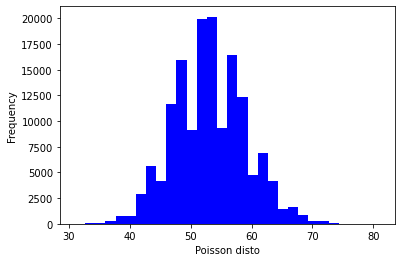

In [6]:
ax=sns.distplot(Population_ages1,bins=30,kde=False,color='blue',hist_kws={"linewidth":15,'alpha':1})
ax.set(xlabel='Poisson disto',ylabel='Frequency')

In [7]:
Population_ages1.mean()

53.00546

[Text(0.5, 0, 'Poisson disto'), Text(0, 0.5, 'Frequency')]

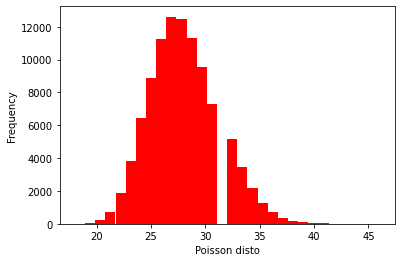

In [8]:
ax=sns.distplot(Population_ages2,bins=30,kde=False,color='red',hist_kws={"linewidth":15,'alpha':1})
ax.set(xlabel='Poisson disto',ylabel='Frequency')

In [9]:
Population_ages2.mean()

27.99774

In [10]:
np.random.seed(6)
sample_ages=np.random.choice(a=Population_ages,size=500)    #Sample=500 Values

print('Sample_ages Mean::=')
print(sample_ages.mean())      # Sample Mean
print('\n')
#checking Difference Between Means
print('Checking Difference Between Means::=')
Population_ages.mean() - sample_ages.mean()

Sample_ages Mean::=
42.388


Checking Difference Between Means::=


0.614372000000003

# Conclusion(>Task 1<)
## Our point estimate based on a sample of 500 individuals underestimates the true population mean by 0.6 years, but it is close. 
## This illustrates an important point: we can get a fairly accurate estimate of a large population by sampling a relatively small subset of individuals.

# Estimating proportions of Races in Population:-

In [11]:
random.seed(10)
Population_races =(["White"]*100000)+(["Black"]*50000)+\
                    (["Hispanic"]*50000)+(["Asian"]*25000)+\
                        (["other"]*25000)

In [12]:
len(Population_races)

250000

In [13]:
# Sample 1000 Values
demo_sample =random.sample( Population_races,1000 )

In [14]:
len(demo_sample)

1000

In [15]:
for race in set(demo_sample):
  print(race + " proportion estimate: ")
  print(demo_sample.count(race)/1000)

Hispanic proportion estimate: 
0.192
other proportion estimate: 
0.099
White proportion estimate: 
0.379
Black proportion estimate: 
0.231
Asian proportion estimate: 
0.099


# Interval Estimate / Confidence Interval :-

### A point estimate can give you a rough idea of a population parameter like the mean, but estimates are prone to error and taking multiple samples to get improved estimates may not be feasible.

### A confidence interval is a range of values above and below a point estimate that captures the true population parameter at some predetermined confidence level.

### For example, if you want to have a 95% chance of capturing the true population parameter with a point estimate and a corresponding confidence interval, you'd set your confidence level to 95%. Higher confidence levels result in a wider confidence intervals.

### Let's calculate a 95% confidence for our mean point estimate

In [16]:
np.random.seed(10)

sample_size =1000
sample = np.random.choice(a = Population_ages, size = sample_size)
sample_mean = sample.mean()

z_critical = stats.norm.ppf(q = 0.975)

print("z-critical value: ")
print(z_critical)

pop_stdev = Population_ages.std()

margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size))

confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)


print("Confidence Interval: ")
print(confidence_interval)

z-critical value: 
1.959963984540054
Confidence Interval: 
(41.70306406882683, 43.34293593117317)


### Let's create several confidence intervals and plot them to get a better sense of what it means to "capture" the true means:-


In [17]:
np.random.seed(12)

intervals=[]
sample_means=[]

for sample in range(25):
  sample=np.random.choice(a=Population_ages,size=sample_size)
  sample_mean=sample.mean()
  sample_means.append(sample_mean)

  z_critical=stats.norm.ppf(q = 0.975)

  pop_stdev=Population_ages.std()

  margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size))

  confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)

  intervals.append(confidence_interval)

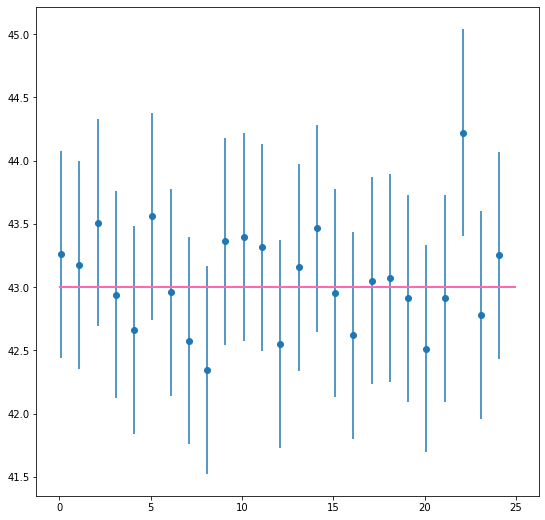

In [18]:
plt.figure(figsize=(9,9))

plt.errorbar(x=np.arange(0.1,25,1),
             y=sample_means,
             yerr=[(top-bot)/2 for top,bot in intervals],
             fmt='o')

plt.hlines(xmin=0,xmax=25,y=43.0023,linewidth=2.0,color="hotpink")

# Conclusion
## By this we learnt in theis practical to analyse the mean of a Random Practical Range in a Population Range & used the data for analysis of mean.
## We calculated the interval mean of the data at 95%confidence which shows us the point estimates.